In [2]:
#q1 A
def mul(n):
    return n*3
def sub(n):
    return mul(n)-2
print("mul of 4: ",mul(4))
print("sub of 4: ",sub(4))

mul of 4:  12
sub of 4:  10


In [3]:
#q1 B
roll_no = list(range(1,51))
mul_of_5 = [roll for roll in roll_no if roll % 5 == 0]
print("student with roll no multiple of 5: ",mul_of_5)

student with roll no multiple of 5:  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


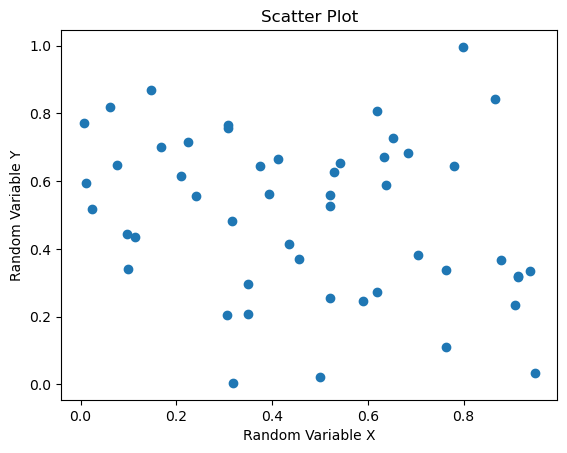

In [4]:
#q1 c scatter plot 
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(50)
y = np.random.rand(50)

plt.scatter(x,y)
plt.xlabel('Random Variable X')
plt.ylabel('Random Variable Y')
plt.title('Scatter Plot')
plt.show()

In [5]:
#q1 d
import seaborn as sns
print(sns.get_dataset_names())
titanic = sns.load_dataset('titanic')
titanic.head(10)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [13]:
#Titanic dataset – percentage of male and female survived
titanic = sns.load_dataset('titanic')
survival = titanic.groupby(['sex'])['survived'].mean()*100
survival

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

In [14]:
#e create sqlite DB and print version

import sqlite3
conn = sqlite3.connect('student.db')
query = "select sqlite_version();"
cursor = conn.cursor()
cursor.execute(query)
print("SQlite version - ",cursor.fetchone()[0])
conn.close()



SQlite version -  3.39.3


In [16]:
#Q2 vowel frequency analysis

def analyze_vowels(text):
    vowels = 'aeiou'
    text = text.lower()
    vowel_freq = {v: 0 for v in vowels}
    Total = 0

    for char in text:
        if char in vowels:
            vowel_freq[char] += 1
            Total += 1
    
    for v in vowel_freq:
        percentage = (vowel_freq[v]/Total*100) if Total > 0 else 0
        print(f"{v.upper()}-{vowel_freq[v]}({percentage:.2f}%)")

text = "Data Analysis with python"
analyze_vowels(text)

A-4(57.14%)
E-0(0.00%)
I-2(28.57%)
O-1(14.29%)
U-0(0.00%)


In [ ]:
#Q3

import sqlite3

# Connect and create DB
conn = sqlite3.connect('employee.db')
cursor = conn.cursor()

# Create Table (fixed: added missing closing parenthesis)
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees(
    name TEXT,
    emp_id TEXT,
    department TEXT,
    position TEXT,
    salary INTEGER,
    status TEXT CHECK(status IN ('Active', 'Inactive'))
)
''')

# Insert data (fixed: remove wrong query tuple)
data = [
    ('Jhon', 'E001', 'HR', 'Manager', 50000, 'Active'),
    ('Alice', 'E002', 'Finance', 'Analyst', 60000, 'Active'),
    ('Bob', 'E003', 'IT', 'Developer', 70000, 'Inactive'),
    ('Emily', 'E004', 'Marketing', 'Coordinator', 55000, 'Active'),
    ('David', 'E005', 'Operations', 'Specialist', 65000, 'Inactive')
]
cursor.executemany('INSERT INTO employees VALUES (?, ?, ?, ?, ?, ?)', data)

# Display all records (fixed: fetchmany needs a number or use fetchall)
cursor.execute('SELECT * FROM employees')
employee = cursor.fetchall()
print("All Employees:")
for emp in employee:
    print(emp)

# Search for Bob
cursor.execute("SELECT * FROM employees WHERE name = 'Bob' AND emp_id = 'E003'")
print("\nSearch Bob:", cursor.fetchone())

# Update Bob's salary
cursor.execute("UPDATE employees SET salary = 80000 WHERE name = 'Bob' AND emp_id = 'E003'")
conn.commit()

# Confirm update
cursor.execute("SELECT * FROM employees WHERE name = 'Bob'")
print("\nUpdated Bob:", cursor.fetchone())

All Employees:
('Jhon', 'E001', 'HR', 'Manager', 50000, 'Active')
('Alice', 'E002', 'Finance', 'Analyst', 60000, 'Active')
('Bob', 'E003', 'IT', 'Developer', 70000, 'Inactive')
('Emily', 'E004', 'Marketing', 'Coordinator', 55000, 'Active')
('David', 'E005', 'Operations', 'Specialist', 65000, 'Inactive')

Search Bob: ('Bob', 'E003', 'IT', 'Developer', 70000, 'Inactive')

Updated Bob: ('Bob', 'E003', 'IT', 'Developer', 80000, 'Inactive')


In [25]:
#Q4 sport event participation

import pandas as pd

master_data = pd.DataFrame({
    'id':[1,2,3,4,5,6],
    'name':['A','B','C','D','E','F'],
    'city':['mumbai','delhi','mumbai','chennai','delhi','mumbai'],
    'sport1':[1,0,0,1,0,0],
    'sport2':[0,1,0,0,1,0],
    'sport3':[0,0,1,0,0,0]
})

# I. only one sport 
master_data['total'] = master_data[['sport1','sport2','sport3']].sum(axis=1)
only_one_sport = master_data[master_data['total']==1][['id','name']]
print("Employee who played only 1 sport:\n",only_one_sport)


# II. city with max participation
city_counts = master_data.groupby('city')[['sport1','sport2','sport3']].sum().sum(axis=1)
print("city with max participation is: ",city_counts.idxmax())

Employee who played only 1 sport:
    id name
0   1    A
1   2    B
2   3    C
3   4    D
4   5    E
city with max participation is:  delhi


In [ ]:
#Q5 Expore 'cars_data' datasets

#part A Analyze
cars = pd.read_csv('cars_data.csv')
cars.info()
cars.describe()
cars.columns
cars.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


(7253, 14)

In [44]:
#partB Data cleaning

#checking null value 
cars.isnull().sum()


# filling null values
cars = cars.dropna()
print("After cleaning:\n",cars.head())

After cleaning:
     S.No.                               Name Location  Year  \
2       2                       Honda Jazz V  Chennai  2011   
7       7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
10     10                   Maruti Ciaz Zeta    Kochi  2018   
15     15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
20     20                  BMW 3 Series 320d    Kochi  2014   

    Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
2               46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
7               36000    Diesel    Automatic      First  11.36 kmpl  2755 CC   
10              25692    Petrol       Manual      First  21.56 kmpl  1462 CC   
15             110000    Diesel       Manual      First   13.5 kmpl  2477 CC   
20              32982    Diesel    Automatic      First  22.69 kmpl  1995 CC   

         Power  Seats   New_Price  Price  
2     88.7 bhp    5.0   8.61 Lakh   4.50  
7    171.5 bhp    8.0     21 Lakh  17

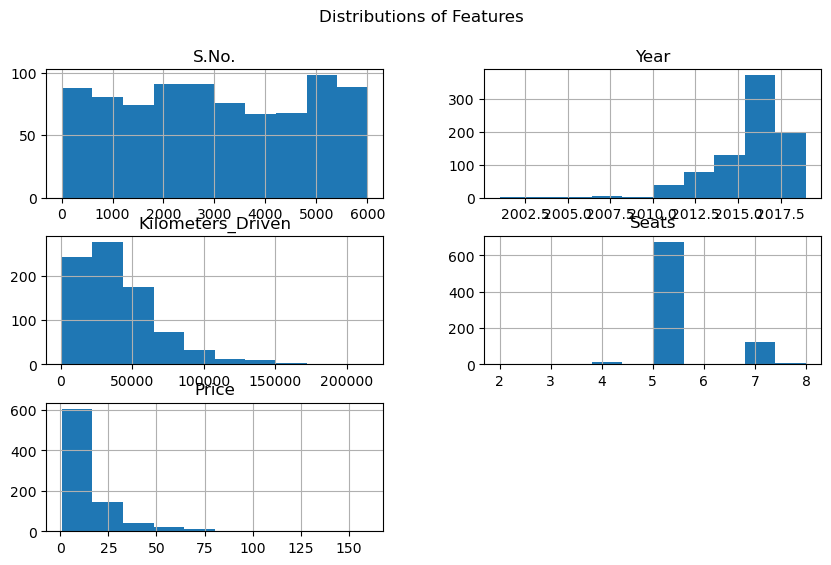

In [49]:
#Q6 a. Distribution and relationship

import seaborn as sns
import matplotlib.pyplot as plt

#Histogram for numeric columns
cars.hist(figsize=(10,6))
plt.suptitle("Distributions of Features")
plt.show()

In [62]:
#b. Pivlot Tables
pivot = cars.pivot_table(values='Price', index='Fuel_Type', aggfunc='mean')
pivot

,Price
Fuel_Type,
CNG,3.567778
Diesel,18.098375
Petrol,8.577601


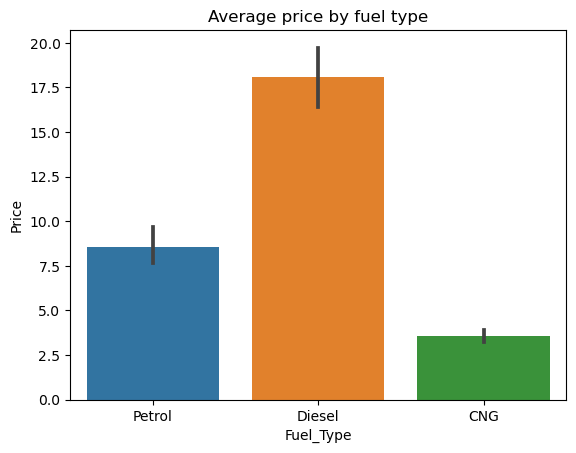

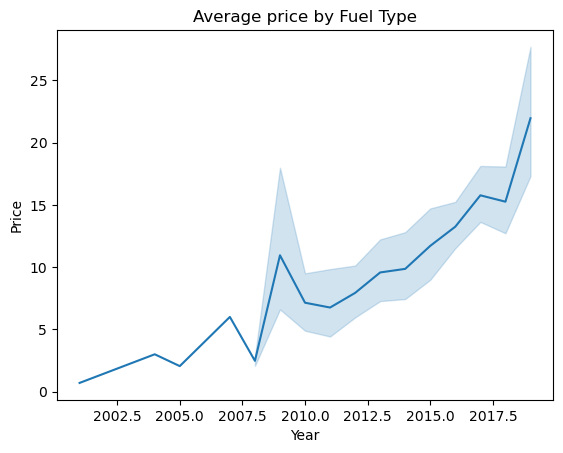

Bar plot shows which fuel type is most expensive on average.
Line plot shows how price varies over years.


In [61]:
#Q7. Create Charts & validate results

#Barplot

sns.barplot(x='Fuel_Type',y='Price',data=cars)
plt.title("Average price by fuel type")
plt.show()

#Lineplot

sns.lineplot(x='Year',y='Price',data=cars)
plt.title("Average price by Fuel Type")
plt.show()

# Observations
print("Bar plot shows which fuel type is most expensive on average.")
print("Line plot shows how price varies over years.")